In [1]:
!pip install geopandas
!pip install geoplot

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 994 kB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 14.8 MB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 7.4 MB 1.7 MB/s eta 0:00:01
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 14.4 MB 2.2 MB/s eta 0:00:01
    ERROR: Command errored out with exit status 1:
     command: /Library/Developer/CommandLineTools/usr/bin/python3 -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/fn/v91kyh7d2cn58sxh1cdbwhrw0000gn/T/pip-install-teegwo_4/cartopy_276eed12a19040e98bc3034e28a64cd8/setup.py'"'"'; __file__='"'"'/private/var/folders/fn/v91kyh7d2cn58sxh1cdbwhrw0000gn/T/pip-install-teegwo_4/cartopy_276eed12a19040e98bc3034e28a64cd8/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__fil

     |████████████████████████████████| 8.2 MB 2.5 MB/s eta 0:00:01
    ERROR: Command errored out with exit status 1:
     command: /Library/Developer/CommandLineTools/usr/bin/python3 -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/fn/v91kyh7d2cn58sxh1cdbwhrw0000gn/T/pip-install-teegwo_4/cartopy_dd3026f1ea564c7594b12383a240ca0e/setup.py'"'"'; __file__='"'"'/private/var/folders/fn/v91kyh7d2cn58sxh1cdbwhrw0000gn/T/pip-install-teegwo_4/cartopy_dd3026f1ea564c7594b12383a240ca0e/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /private/var/folders/fn/v91kyh7d2cn58sxh1cdbwhrw0000gn/T/pip-pip-egg-info-5cxiivcl
         cwd: /private/var/folders/fn/v91kyh7d2cn58sxh1cdbwhrw0000gn/T/pip-install-teegwo_4/cartopy_dd3026f1ea564c7594b12383a240ca0e/
    Complete output (12 lines):
    Traceback (most recent call last):
      Fi

In [2]:
import geopandas as gp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import descartes
import geoplot as gplt
import geoplot.crs as gcrs

ModuleNotFoundError: No module named 'geopandas'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# read shape files
q1 = gp.read_file('/content/drive/MyDrive/Ookla data by cities/Ookla shape data/2020q1')
q2 = gp.read_file('/content/drive/MyDrive/Ookla data by cities/Ookla shape data/2020q2')
q3 = gp.read_file('/content/drive/MyDrive/Ookla data by cities/Ookla shape data/2020q3')
q4 = gp.read_file('/content/drive/MyDrive/Ookla data by cities/Ookla shape data/2020q4')
ma = gp.read_file('/content/drive/MyDrive/Ookla data by cities/export-gisdata.mapc.ma_municipalities').to_crs(epsg=4326)

In [5]:
data_2020 = pd.concat([q1,q2,q3,q4])

<AxesSubplot:>

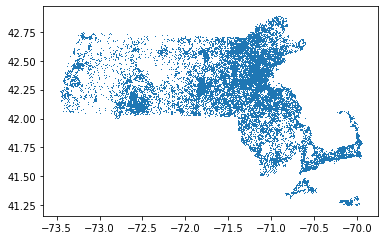

In [ ]:
data_2020.plot()

In [6]:
# use the location of the centroid of each polygon
data_2020['geometry'] = data_2020['geometry'].centroid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


In [ ]:
ax = gplt.webmap(data_2020, projection=gcrs.WebMercator())
gplt.pointplot(data_2020, ax=ax, hue='avg_d_kbps', legend=True)

In [ ]:
ax = gplt.webmap(data_2020, projection=gcrs.WebMercator())
gplt.kdeplot(data_2020[['avg_d_kbps', 'geometry']], n_levels=50, cmap='Reds', thresh=0.05 ,shade=True, ax=ax)

<AxesSubplot:>

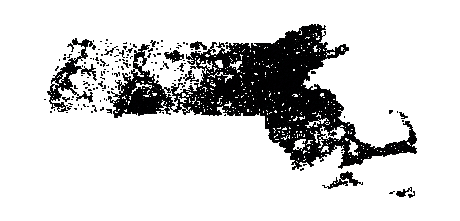

In [ ]:
gplt.choropleth(q1, hue='avg_d_kbps')